<a href="https://colab.research.google.com/github/nxf-emma/APS360-Artificial-Intelligence-Fundamentals/blob/main/Res.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount googledrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import numpy as np
import os
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
resnet18new = torchvision.models.resnet.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
def get_accuracy(model, dataloader):
    

    correct = 0
    total = 0
    for imgs, labels in dataloader:
        
        if use_cuda and torch.cuda.is_available():
            imgs = imgs.cuda()
            labels = labels.cuda()

        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
def train2(model, train_data, val_data, batch_size=3000, num_epochs=5, lr = 0.01):
    
    num_workers = 1
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9,weight_decay=5e-4)
    # optimizer = optim.Adam(model.parameters(), lr=lr)
    iters, losses, train_acc, val_acc = [], [], [], []

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch", epoch)
        n = 0
        for imgs, labels in iter(train_loader):
            # print("iteration ", n)

            if use_cuda and torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)             # forward pass

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            n += 1

        # save the current training information
        iters.append(epoch)
        losses.append(float(loss)/batch_size)             # compute *average* loss
        # calculate accuracy at each epoch instead of iteration
        # def get_accuracy(model, data):
        train_acc.append(get_accuracy(model, train_loader)) # compute training accuracy 
        # compute validation acc every epoch
        val_acc.append(get_accuracy(model, val_loader))  # compute validation accuracy
        print("Epoch: ", epoch, " Train Accuracy: ", train_acc[epoch])
        print("Epoch: ", epoch, " Validation Accuracy: ", val_acc[epoch])

            

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

In [ ]:
parent_path = '/content/drive/MyDrive/APS360 Team/aps360_dataset/small-dataset/'

data_transform = transforms.Compose(
    [
        # transforms.Resize((224,224)), 
        #convert image to grayscale
        # transforms.Grayscale(num_output_channels=3),
        #randomly adding brightness 
        # transforms.ColorJitter(brightness=(1,1.2)),
        #apply ramdom rotation from -30 to 30 degrees
        # transforms.RandomRotation(30),
        #apply random horizontal flip with probability of 50% 
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        #normalize the data with 0.5 mean and variance.
        transforms.Normalize((0.5073955,), (0.25,), inplace=True)
       
    ])
training_set = torchvision.datasets.ImageFolder(parent_path+'train',data_transform)
valid_set = torchvision.datasets.ImageFolder(parent_path+'test',data_transform)

In [ ]:
re = torchvision.models.resnet.resnet18()

CUDA is available!  Training on GPU ...
Epoch 0
Epoch:  0  Train Accuracy:  0.27
Epoch:  0  Validation Accuracy:  0.22
Epoch 1
Epoch:  1  Train Accuracy:  0.304
Epoch:  1  Validation Accuracy:  0.21
Epoch 2
Epoch:  2  Train Accuracy:  0.396
Epoch:  2  Validation Accuracy:  0.25
Epoch 3
Epoch:  3  Train Accuracy:  0.438
Epoch:  3  Validation Accuracy:  0.232
Epoch 4
Epoch:  4  Train Accuracy:  0.622
Epoch:  4  Validation Accuracy:  0.226
Epoch 5
Epoch:  5  Train Accuracy:  0.592
Epoch:  5  Validation Accuracy:  0.256
Epoch 6
Epoch:  6  Train Accuracy:  0.76
Epoch:  6  Validation Accuracy:  0.236
Epoch 7
Epoch:  7  Train Accuracy:  0.85
Epoch:  7  Validation Accuracy:  0.27
Epoch 8
Epoch:  8  Train Accuracy:  0.858
Epoch:  8  Validation Accuracy:  0.254
Epoch 9
Epoch:  9  Train Accuracy:  0.874
Epoch:  9  Validation Accuracy:  0.234
Epoch 10
Epoch:  10  Train Accuracy:  0.94
Epoch:  10  Validation Accuracy:  0.236
Epoch 11
Epoch:  11  Train Accuracy:  0.916
Epoch:  11  Validation Accurac

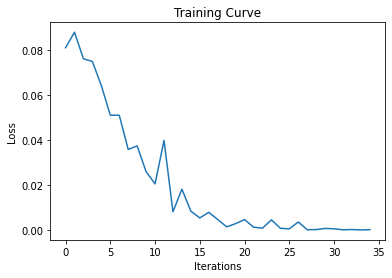

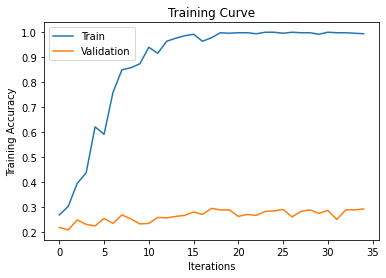

Final Training Accuracy: 0.994
Final Validation Accuracy: 0.294


In [ ]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
  re.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

train2(re, training_set, valid_set,batch_size= 20, lr=0.001, num_epochs=35)